In [638]:
import datetime as dt
from datetime import datetime

import pandas as pd

from sklearn.linear_model import LinearRegression

import matplotlib as mpl
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [88]:
mpl.rcParams['figure.figsize'] = (15, 10)
mpl.rcParams['axes.grid'] = False

# Data Preparation

In [391]:
covid_df = pd.read_csv(r'/data/users/ahiremat/ML Project/COVID Data/rows_1.csv')
covid_df.reset_index()
covid_df = covid_df.set_index("submission_date")
covid_df = covid_df.groupby(['submission_date']).sum()
covid_df = covid_df[["tot_cases", "new_case", "tot_death", "new_death"]].reset_index()
covid_df["submission_date"] = pd.to_datetime(covid_df["submission_date"])
covid_df = covid_df.set_index("submission_date")
covid_df.loc[covid_df["new_case"]<10000]

,tot_cases,new_case,tot_death,new_death
submission_date,,,,
2020-01-22,1,1,0,0
2020-01-23,1,0,0,0
2020-01-24,2,1,0,0
2020-01-25,2,0,0,0
2020-01-26,5,3,0,0
2020-01-27,5,0,0,0
2020-01-28,5,0,0,0
2020-01-29,5,0,0,0
2020-01-30,5,0,0,0


In [90]:
sp_df = pd.read_csv(r'/data/users/ahiremat/ML Project/Stock Data/GSPC.csv')
sp_df["Date"] = pd.to_datetime(sp_df["Date"])
sp_df = sp_df.set_index("Date")

In [373]:
index = pd.date_range("2020-01-22","2020-12-13")
sp_df = sp_df.reindex(index)
sp_df = sp_df.fillna(method='pad')
#sp_df.loc["2020-03-15":"2020-04-15"]

,Open,High,Low,Close,Adj Close,Volume
2020-03-15,2569.989990,2711.330078,2492.370117,2711.020020,2711.020020,8.258670e+09
2020-03-16,2508.590088,2562.979980,2380.939941,2386.129883,2386.129883,7.781540e+09
2020-03-17,2425.659912,2553.929932,2367.040039,2529.189941,2529.189941,8.358500e+09
2020-03-18,2436.500000,2453.570068,2280.520020,2398.100098,2398.100098,8.755780e+09
2020-03-19,2393.479980,2466.969971,2319.780029,2409.389893,2409.389893,7.946710e+09
2020-03-20,2431.939941,2453.010010,2295.560059,2304.919922,2304.919922,9.044690e+09
2020-03-21,2431.939941,2453.010010,2295.560059,2304.919922,2304.919922,9.044690e+09
2020-03-22,2431.939941,2453.010010,2295.560059,2304.919922,2304.919922,9.044690e+09
2020-03-23,2290.709961,2300.729980,2191.860107,2237.399902,2237.399902,7.402180e+09
2020-03-24,2344.439941,2449.709961,2344.439941,2447.330078,2447.330078,7.547350e+09


In [128]:
merged_df = covid_df.merge(sp_df, left_index = True, right_index = True )
merged_df = merged_df.drop(columns = ["Volume"])
merged_df.loc[merged_df["new_case"]== 0]

,tot_cases,new_case,tot_death,new_death,Open,High,Low,Close,Adj Close
2020-01-23,1,0,0,0,3315.770020,3326.879883,3301.870117,3325.540039,3325.540039
2020-01-25,2,0,0,0,3333.100098,3333.179932,3281.530029,3295.469971,3295.469971
2020-01-27,5,0,0,0,3247.159912,3258.850098,3234.500000,3243.629883,3243.629883
2020-01-28,5,0,0,0,3255.350098,3285.780029,3253.219971,3276.239990,3276.239990
2020-01-29,5,0,0,0,3289.459961,3293.469971,3271.889893,3273.399902,3273.399902
2020-01-30,5,0,0,0,3256.449951,3285.909912,3242.800049,3283.659912,3283.659912
2020-02-02,8,0,0,0,3282.330078,3282.330078,3214.679932,3225.520020,3225.520020
2020-02-04,11,0,0,0,3280.610107,3306.919922,3280.610107,3297.590088,3297.590088
2020-02-05,11,0,0,0,3324.909912,3337.580078,3313.750000,3334.689941,3334.689941
2020-02-06,11,0,0,0,3344.919922,3347.959961,3334.389893,3345.780029,3345.780029


In [300]:
lstm_df = merged_df[["Open","new_case","Close"]]
lstm_arr = lstm_df.to_numpy()
lstm_arr

array([[3.33002002e+03, 1.00000000e+00, 3.32175000e+03],
       [3.31577002e+03, 0.00000000e+00, 3.32554004e+03],
       [3.33310010e+03, 1.00000000e+00, 3.29546997e+03],
       [3.33310010e+03, 0.00000000e+00, 3.29546997e+03],
       [3.33310010e+03, 3.00000000e+00, 3.29546997e+03],
       [3.24715991e+03, 0.00000000e+00, 3.24362988e+03],
       [3.25535010e+03, 0.00000000e+00, 3.27623999e+03],
       [3.28945996e+03, 0.00000000e+00, 3.27339990e+03],
       [3.25644995e+03, 0.00000000e+00, 3.28365991e+03],
       [3.28233008e+03, 2.00000000e+00, 3.22552002e+03],
       [3.28233008e+03, 1.00000000e+00, 3.22552002e+03],
       [3.28233008e+03, 0.00000000e+00, 3.22552002e+03],
       [3.23565991e+03, 3.00000000e+00, 3.24891992e+03],
       [3.28061011e+03, 0.00000000e+00, 3.29759009e+03],
       [3.32490991e+03, 0.00000000e+00, 3.33468994e+03],
       [3.34491992e+03, 0.00000000e+00, 3.34578003e+03],
       [3.33554004e+03, 0.00000000e+00, 3.32770996e+03],
       [3.33554004e+03, 0.00000

# Split Sequences

In [301]:
x,y = list(), list()
n_steps = 5
for i in range(len(lstm_arr)):
    end_ix = i + n_steps
    if end_ix > len(lstm_arr):
        break
    seqx, seqy = lstm_arr[i:end_ix, : -1], lstm_arr[end_ix-1,-1]
    x.append(seqx)
    y.append(seqy)
x = np.array(x)
y = np.array(y)
print(x, y)



[[[3.33002002e+03 1.00000000e+00]
  [3.31577002e+03 0.00000000e+00]
  [3.33310010e+03 1.00000000e+00]
  [3.33310010e+03 0.00000000e+00]
  [3.33310010e+03 3.00000000e+00]]

 [[3.31577002e+03 0.00000000e+00]
  [3.33310010e+03 1.00000000e+00]
  [3.33310010e+03 0.00000000e+00]
  [3.33310010e+03 3.00000000e+00]
  [3.24715991e+03 0.00000000e+00]]

 [[3.33310010e+03 1.00000000e+00]
  [3.33310010e+03 0.00000000e+00]
  [3.33310010e+03 3.00000000e+00]
  [3.24715991e+03 0.00000000e+00]
  [3.25535010e+03 0.00000000e+00]]

 ...

 [[3.60015991e+03 1.96227000e+05]
  [3.60015991e+03 2.19187000e+05]
  [3.60015991e+03 2.14099000e+05]
  [3.60015991e+03 2.06992000e+05]
  [3.60015991e+03 1.74387000e+05]]

 [[3.60015991e+03 2.19187000e+05]
  [3.60015991e+03 2.14099000e+05]
  [3.60015991e+03 2.06992000e+05]
  [3.60015991e+03 1.74387000e+05]
  [3.60015991e+03 1.86215000e+05]]

 [[3.60015991e+03 2.14099000e+05]
  [3.60015991e+03 2.06992000e+05]
  [3.60015991e+03 1.74387000e+05]
  [3.60015991e+03 1.86215000e+05

# Multivariate LSTM - Predicting one value

In [302]:
n_features = x.shape[2]

#Defining Model

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape = (n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer = "adam", loss = "mse")

# Fit model

model.fit(x,y, epochs = 200, verbose = 0)

# Prediction demo

x_input = array([[3000, 1],[2980, 20], [2900, 100], [2850, 200], [2800, 300]])
x_input = x_input.reshape((1, n_steps, n_features))

yhat = model.predict(x_input, verbose = 0)

print(yhat)

[[2874.3557]]


# Univariate LSTM Prediction - Predicting a line

In [174]:
uni_lstm = merged_df.drop(columns = ['Open', 'High', 'Low', 'Adj Close',
                                  'tot_cases', 'new_case', 'tot_death', 'new_death'])
uni_lstm = uni_lstm.reset_index()
close_data = uni_lstm["Close"].values
close_data = close_data.reshape((-1, 1))

split_percent = 0.8
split = int(split_percent * len(close_data))

close_train = close_data[:split]
close_test = close_data[split:]

date_train = uni_lstm["index"][:split]
date_test = uni_lstm["index"][split:]


In [175]:
#Splitting the Data into train and test test and also making it lookback the previous 5 units

look_back = 5

train_generator = TimeseriesGenerator(close_train, close_train, length= look_back, batch_size = 15)
test_generator = TimeseriesGenerator(close_test, close_test, length = look_back, batch_size = 1)

In [201]:
#Creating and training the Model

model = Sequential()

model.add(LSTM(10, activation = "relu", input_shape = (look_back,1)))
model.add(Dense(1))
model.compile(optimizer = "adam", loss = "mse")

num_epochs = 100

model.fit_generator(train_generator, epochs = num_epochs, verbose = 1)


Epoch 1/100
17/17 [==============================] - 3s 170ms/step - loss: 7693462.4259
Epoch 2/100
17/17 [==============================] - 0s 9ms/step - loss: 7483128.3472
Epoch 3/100
17/17 [==============================] - 0s 11ms/step - loss: 7264098.0930
Epoch 4/100
17/17 [==============================] - 0s 15ms/step - loss: 7025924.5860
Epoch 5/100
17/17 [==============================] - 0s 16ms/step - loss: 6765175.1096
Epoch 6/100
17/17 [==============================] - 0s 15ms/step - loss: 6490049.6527
Epoch 7/100
17/17 [==============================] - 0s 11ms/step - loss: 6195589.0303
Epoch 8/100
17/17 [==============================] - 0s 16ms/step - loss: 5878922.7319
Epoch 9/100
17/17 [==============================] - 0s 16ms/step - loss: 5539293.0544
Epoch 10/100
17/17 [==============================] - 0s 15ms/step - loss: 5184564.9053
Epoch 11/100
17/17 [==============================] - 0s 10ms/step - loss: 4818481.3637
Epoch 12/100
17/17 [=====================

In [205]:
prediction = model.predict_generator(test_generator)

close_train = close_train.reshape((-1))
close_test = close_test.reshape((-1))
prediction = prediction.reshape((-1))

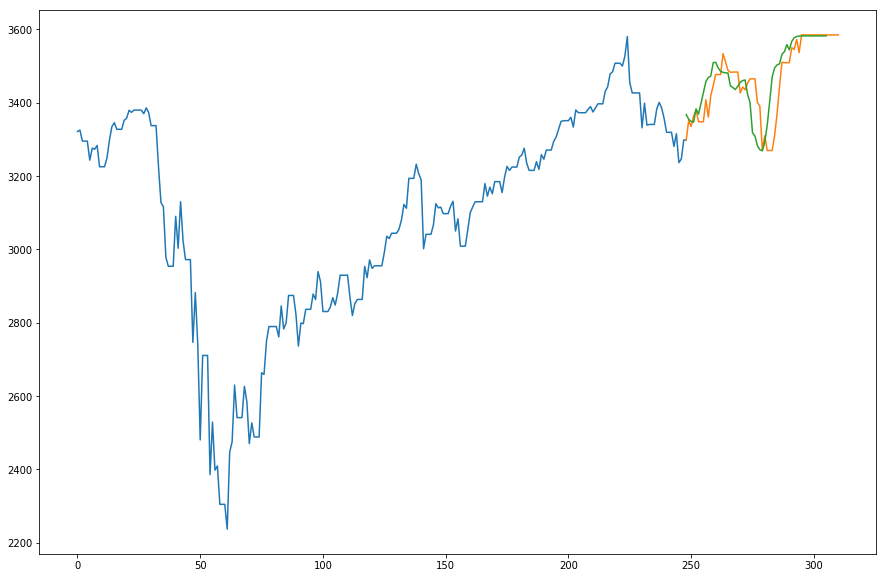

In [206]:
fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize =(15,10))

xa = range(249)
xb = range(248, (249+62))
xc = range(248, (249+57))
ax.plot(xa, close_train, label = "Data")
ax.plot(xb, close_test, label = "Test")
ax.plot(xc, prediction, label = "Pred")

# Following this Tutorial
https://www.tensorflow.org/tutorials/structured_data/time_series

In [640]:
#merged_df = merged_df.reset_index()
merged_df = merged_df[['tot_cases','new_case', 'tot_death', 'new_death', 'Open', 'High', 'Low','Close']]
date_time = pd.to_datetime(merged_df.pop("submission_date"), format='%d.%m.%Y')
date_time

df = merged_df[['new_case','new_death', 'Open','Close']]
df

KeyError: 'submission_date'

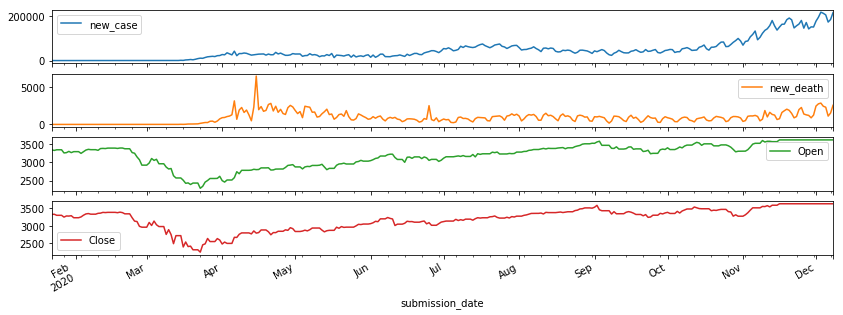

In [577]:
plot_cols = ['new_case','new_death', 'Open','Close']
plot_features = plot_cols
#plot_features.index = date_time 

#_ = plot_features.plot(subplots = True)

plot_features = merged_df[plot_cols][:322]
plot_features.index = date_time[:322MM]
_ = plot_features.plot(subplots = True)

In [265]:
merged_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tot_cases,322.0,4.057896e+06,3.956734e+06,1.000000,532675.500000,2.652618e+06,6.757280e+06,1.504018e+07
new_case,322.0,4.670862e+04,4.689369e+04,0.000000,19914.750000,3.528100e+04,5.751800e+04,2.191870e+05
tot_death,322.0,1.210010e+05,8.898085e+04,0.000000,20805.250000,1.276615e+05,1.985770e+05,2.853510e+05
new_death,322.0,8.861832e+02,7.450916e+02,0.000000,381.750000,8.330000e+02,1.168500e+03,6.489000e+03
Open,322.0,3.177788e+03,3.058590e+02,2290.709961,2954.199951,3.255105e+03,3.383635e+03,3.600160e+03
High,322.0,3.203421e+03,2.972549e+02,2300.729980,2981.700012,3.277995e+03,3.399855e+03,3.645990e+03
Low,322.0,3.148481e+03,3.192001e+02,2191.860107,2933.590088,3.221460e+03,3.366150e+03,3.600160e+03
Close,322.0,3.179048e+03,3.091199e+02,2237.399902,2971.800109,3.250380e+03,3.385003e+03,3.626910e+03


### Splitting the Data

In [275]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]



### Normalizing the data

Normalized Data = (Data - Mean)/Standard Dev

In [276]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df-train_mean)/train_std
val_df = (val_df - train_mean)/train_std
test_df = (val_df - train_mean)/ train_std 

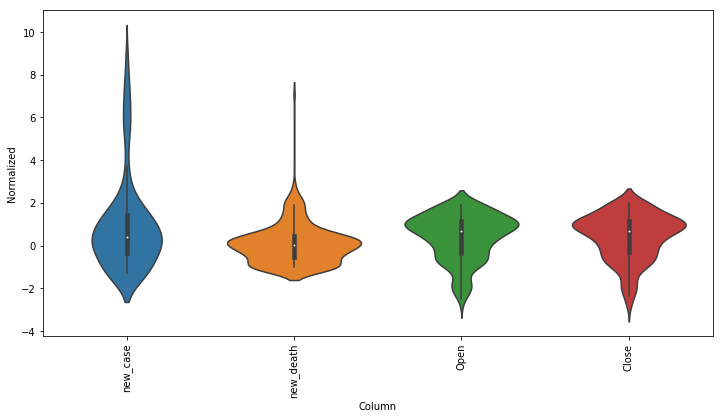

In [277]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [305]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [307]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['Close'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['Close']

In [308]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['Close'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['Close']

In [309]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [310]:
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])


example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 4)
Inputs shape: (3, 6, 4)
labels shape: (3, 1, 1)


### Plotting input and labels

In [316]:
w2.example = example_inputs, example_labels

In [636]:
def plot(self, model=None, plot_col='Close', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(3, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

NameError: name 'WindowGenerator' is not defined

In [322]:
w2.plot(plot_col='Close')

TypeError: object of type 'Tensor' has no len()

<Figure size 864x576 with 0 Axes>

### Making data into Tf.data.datasets

In [332]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [333]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [334]:
w2.train.element_spec

AttributeError: module 'tensorflow.keras.preprocessing' has no attribute 'timeseries_dataset_from_array'

In [2]:
tf.version.VERSION

'2.3.1'

In [336]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['Close'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['Close']

### ^^^^^LSTM in tutorial

Unable to continue because Tensorflow version not up to date

In [10]:

df = merged_df
#df = df[['new_case', 'Close']]

# Tutorial 

https://www.youtube.com/watch?v=gSYiKKoREFI

https://github.com/vb100/multivariate-lstm/blob/master/LSTM_model_stocks.ipynb

In [554]:
df

#features for training 

cols = list(df)

# extract dates from df

train_dates = list(df.index)
#train_dates = [dt.datetime.strptime(date) for date in train_dates]

#print('Training Set Shape =={}'.format(train_dates.shape))
print('All Timestamps == {}'.format(len(train_dates)))
print('Features =={} '.format(cols))

All Timestamps == 322
Features ==['new_case', 'Close'] 


In [555]:
df = df[cols].astype(str)
for i in cols:
    for j in range(0, len(df)):
        df[i][j] = df[i][j].replace(',', '')

df = df.astype(float)

normalized_df = (df-df.mean())/df.std()
# Using multiple features (predictors)
training_set = df.as_matrix()

print('Shape of training set == {}.'.format(training_set.shape))
training_set

Shape of training set == (322, 2).


/cm/shared/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


array([[1.00000000e+00, 3.32175000e+03],
       [0.00000000e+00, 3.32554004e+03],
       [1.00000000e+00, 3.29546997e+03],
       [0.00000000e+00, 3.29546997e+03],
       [3.00000000e+00, 3.29546997e+03],
       [0.00000000e+00, 3.24362988e+03],
       [0.00000000e+00, 3.27623999e+03],
       [0.00000000e+00, 3.27339990e+03],
       [0.00000000e+00, 3.28365991e+03],
       [2.00000000e+00, 3.22552002e+03],
       [1.00000000e+00, 3.22552002e+03],
       [0.00000000e+00, 3.22552002e+03],
       [3.00000000e+00, 3.24891992e+03],
       [0.00000000e+00, 3.29759009e+03],
       [0.00000000e+00, 3.33468994e+03],
       [0.00000000e+00, 3.34578003e+03],
       [0.00000000e+00, 3.32770996e+03],
       [0.00000000e+00, 3.32770996e+03],
       [0.00000000e+00, 3.32770996e+03],
       [0.00000000e+00, 3.35209009e+03],
       [1.00000000e+00, 3.35775000e+03],
       [0.00000000e+00, 3.37944995e+03],
       [1.00000000e+00, 3.37393994e+03],
       [0.00000000e+00, 3.38015991e+03],
       [0.000000

### Normalize Data

In [556]:
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

sc_predict = MinMaxScaler()
sc_predict.fit_transform(training_set[:, 0:1])

array([[4.56231437e-06],
       [0.00000000e+00],
       [4.56231437e-06],
       [0.00000000e+00],
       [1.36869431e-05],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [9.12462874e-06],
       [4.56231437e-06],
       [0.00000000e+00],
       [1.36869431e-05],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [4.56231437e-06],
       [0.00000000e+00],
       [4.56231437e-06],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [9.12462874e-06],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [4.56231437e-06],
       [0.00000000e+00],
       [4.56231437e-05],
       [2.73738862e-05],


In [557]:
X_train = []
y_train = []

n_future = 5  # Number of days we want top predict into the future
n_past = 10   # Number of past days we want to use to predict the future

for i in range(n_past, len(training_set_scaled) - n_future +1):
    X_train.append(training_set_scaled[i - n_past:i, 0:df.shape[1] - 1])
    y_train.append(training_set_scaled[i + n_future - 1:i + n_future, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (308, 10, 1).
y_train shape == (308, 1).


In [558]:

# Initializing the Neural Network based on LSTM
model = Sequential()

# Adding 1st LSTM layer
model.add(LSTM(units= 64, return_sequences=True, input_shape=(n_past, df.shape[1]-1)))

# Adding 2nd LSTM layer
model.add(LSTM(units=10, return_sequences=False))

# Adding Dropout
model.add(Dropout(0.25))

# Output layer
model.add(Dense(1))

# Compiling the Neural Network
model.compile(optimizer = "adam", loss='mean_squared_error')

In [614]:
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

history = model.fit(X_train, y_train, shuffle=True, epochs=100, validation_split=0.2, verbose=1, batch_size=50)

NameError: name 'EarlyStopping' is not defined

In [560]:
# Generate list of sequence of days for predictions
datelist_future = pd.date_range(train_dates[-1], periods=n_future, freq='1d').tolist()

'''
Remeber, we have datelist_train from begining.
'''

# Convert Pandas Timestamp to Datetime object (for transformation) --> FUTURE
datelist_future_ = []
for this_timestamp in datelist_future:
    datelist_future_.append(this_timestamp.date())

In [561]:
predictions_future = model.predict(X_train[-n_future:])

predictions_train = model.predict(X_train[n_past:])

In [564]:
# Inverse the predictions to original measurements

# ---> Special function: convert <datetime.date> to <Timestamp>
def datetime_to_timestamp(x):
    '''
        x : a given datetime value (datetime.date)
    '''
    return datetime.strptime(x.strftime('%Y%m%d'), '%Y%m%d')


y_pred_future = sc_predict.inverse_transform(predictions_future)
y_pred_train = sc_predict.inverse_transform(predictions_train)

PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Close']).set_index(pd.Series(datelist_future))
PREDICTION_TRAIN = pd.DataFrame(y_pred_train, columns=['Close']).set_index(pd.Series(train_dates[2 * n_past + n_future -1:]))

#PREDICTIONS_FUTURE = PREDICTIONS_FUTURE/10
# Convert <datetime.date> to <Timestamp> for PREDCITION_TRAIN
#PREDICTION_TRAIN.index = PREDICTION_TRAIN.index.to_series().apply(datetime_to_timestamp)
PREDICTION_TRAIN = PREDICTION_TRAIN/10
PREDICTION_TRAIN.head(3)

,Close
2020-02-15,333.371552
2020-02-16,333.373016
2020-02-17,333.372375


/cm/shared/apps/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cm/shared/apps/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cm/shared/apps/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cm/shared/apps/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cm/shared/apps/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont

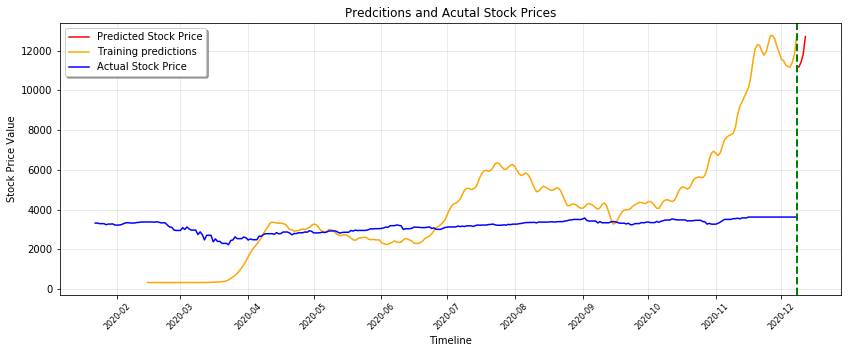

In [565]:
# Set plot size 
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

# Plot parameters
START_DATE_FOR_PLOTTING = '2012-06-01'

plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Close'], color='r', label='Predicted Stock Price')
plt.plot(PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:].index, PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:]['Close'], color='orange', label='Training predictions')
plt.plot(df.loc[START_DATE_FOR_PLOTTING:].index, df.loc[START_DATE_FOR_PLOTTING:]['Close'], color='b', label='Actual Stock Price')

plt.axvline(x = min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title('Predcitions and Acutal Stock Prices', family='Arial', fontsize=12)
plt.xlabel('Timeline', family='Arial', fontsize=10)
plt.ylabel('Stock Price Value', family='Arial', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

^^^^^ This Tutorial makes the COVID data into a single sequence which is why we do not want to use this method for further research

### End to End Multivariate Time Series Modelling w LSTM

https://www.youtube.com/watch?v=4FmVIpcwl4k

https://github.com/srivatsan88/End-to-End-Time-Series/blob/master/Multivariate_Time_Series_Modeling_using_LSTM.ipynb

In [854]:
df = merged_df
df = df[["new_case", "new_case", "Close"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 326 entries, 2020-01-22 to 2020-12-12
Data columns (total 3 columns):
new_case    326 non-null int64
new_case    326 non-null int64
Close       326 non-null float64
dtypes: float64(1), int64(2)
memory usage: 20.2 KB


In [855]:
df.describe()

,new_case,new_case,Close
count,326.000000,326.000000,326.000000
mean,48871.521472,48871.521472,3185.459627
std,50524.946345,50524.946345,312.752177
min,0.000000,0.000000,2237.399902
25%,20473.000000,20473.000000,2972.370117
50%,36194.500000,36194.500000,3257.869995
75%,58926.000000,58926.000000,3388.872497
max,244011.000000,244011.000000,3702.250000


In [856]:
scaler = MinMaxScaler()

data_scaled = scaler.fit_transform(df)

/cm/shared/apps/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [857]:
data_scaled


array([[4.09817590e-06, 4.09817590e-06, 7.40246459e-01],
       [0.00000000e+00, 0.00000000e+00, 7.42833781e-01],
       [4.09817590e-06, 4.09817590e-06, 7.22306037e-01],
       [0.00000000e+00, 0.00000000e+00, 7.22306037e-01],
       [1.22945277e-05, 1.22945277e-05, 7.22306037e-01],
       [0.00000000e+00, 0.00000000e+00, 6.86916690e-01],
       [0.00000000e+00, 0.00000000e+00, 7.09178427e-01],
       [0.00000000e+00, 0.00000000e+00, 7.07239602e-01],
       [0.00000000e+00, 0.00000000e+00, 7.14243738e-01],
       [8.19635180e-06, 8.19635180e-06, 6.74553744e-01],
       [4.09817590e-06, 4.09817590e-06, 6.74553744e-01],
       [0.00000000e+00, 0.00000000e+00, 6.74553744e-01],
       [1.22945277e-05, 1.22945277e-05, 6.90528008e-01],
       [0.00000000e+00, 0.00000000e+00, 7.23753364e-01],
       [0.00000000e+00, 0.00000000e+00, 7.49080087e-01],
       [0.00000000e+00, 0.00000000e+00, 7.56650888e-01],
       [0.00000000e+00, 0.00000000e+00, 7.44315108e-01],
       [0.00000000e+00, 0.00000

In [859]:
features = data_scaled[:,0:2]
target = data_scaled[:,2]
features

array([[4.09817590e-06, 4.09817590e-06],
       [0.00000000e+00, 0.00000000e+00],
       [4.09817590e-06, 4.09817590e-06],
       [0.00000000e+00, 0.00000000e+00],
       [1.22945277e-05, 1.22945277e-05],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [8.19635180e-06, 8.19635180e-06],
       [4.09817590e-06, 4.09817590e-06],
       [0.00000000e+00, 0.00000000e+00],
       [1.22945277e-05, 1.22945277e-05],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [4.09817590e-06, 4.09817590e-06],
       [0.00000000e+00, 0.00000000e+00],
       [4.09817590e-06, 4.09817590e-06],
       [0.00000000e+00, 0.00000000e+00],
       [0.000000

### Make the whole dataset into Timeseries data

In [860]:
TimeseriesGenerator(features, target, length = 1, sampling_rate = 1, batch_size = 1)[0]

(array([[[4.0981759e-06, 4.0981759e-06]]]), array([0.74283378]))

In [861]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size= 0.2, random_state = 40, shuffle = False)

In [862]:
x_train

array([[4.09817590e-06, 4.09817590e-06],
       [0.00000000e+00, 0.00000000e+00],
       [4.09817590e-06, 4.09817590e-06],
       [0.00000000e+00, 0.00000000e+00],
       [1.22945277e-05, 1.22945277e-05],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [8.19635180e-06, 8.19635180e-06],
       [4.09817590e-06, 4.09817590e-06],
       [0.00000000e+00, 0.00000000e+00],
       [1.22945277e-05, 1.22945277e-05],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [4.09817590e-06, 4.09817590e-06],
       [0.00000000e+00, 0.00000000e+00],
       [4.09817590e-06, 4.09817590e-06],
       [0.00000000e+00, 0.00000000e+00],
       [0.000000

In [863]:
y_test.shape

(66,)

### Actual Dataset Generator

In [864]:
win_length = 30
batch_size = 15
num_features = 2

train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate = 1, batch_size = batch_size)

test_generator = TimeseriesGenerator(x_test, y_test, length = win_length, sampling_rate = 1, batch_size = batch_size)

#train_generator = np.asarray(train_generator)
#test_generator = np.asarray(test_generator)

In [865]:
test_generator[0]

(array([[[0.22697337, 0.22697337],
         [0.24046867, 0.24046867],
         [0.21990812, 0.21990812],
         [0.18830708, 0.18830708],
         [0.19217576, 0.19217576],
         [0.19585592, 0.19585592],
         [0.24686592, 0.24686592],
         [0.26109479, 0.26109479],
         [0.28878206, 0.28878206],
         [0.21970321, 0.21970321],
         [0.19310195, 0.19310195],
         [0.24770605, 0.24770605],
         [0.2491609 , 0.2491609 ],
         [0.26205786, 0.26205786],
         [0.30585506, 0.30585506],
         [0.3423862 , 0.3423862 ],
         [0.34407465, 0.34407465],
         [0.25918094, 0.25918094],
         [0.262189  , 0.262189  ],
         [0.29806443, 0.29806443],
         [0.3385708 , 0.3385708 ],
         [0.37098328, 0.37098328],
         [0.41054297, 0.41054297],
         [0.36474585, 0.36474585],
         [0.28581498, 0.28581498],
         [0.35493482, 0.35493482],
         [0.36395081, 0.36395081],
         [0.44033671, 0.44033671],
         [0.48556008

### LSTM Layers

In [866]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape = (win_length, num_features), return_sequences = True))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.5))
model.add(tf.keras.layers.LSTM(128, return_sequences = True))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.5))
model.add(tf.keras.layers.Dropout(0.1)) #regularization method not to over fit, look into this
model.add(LSTM(256, return_sequences=True))
model.add(tf.keras.layers.LSTM(64, return_sequences = False))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(1))

In [867]:
model.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_116 (LSTM)              (None, 30, 128)           67072     
_________________________________________________________________
leaky_re_lu_74 (LeakyReLU)   (None, 30, 128)           0         
_________________________________________________________________
lstm_117 (LSTM)              (None, 30, 128)           131584    
_________________________________________________________________
leaky_re_lu_75 (LeakyReLU)   (None, 30, 128)           0         
_________________________________________________________________
dropout_55 (Dropout)         (None, 30, 128)           0         
_________________________________________________________________
lstm_118 (LSTM)              (None, 30, 256)           394240    
_________________________________________________________________
lstm_119 (LSTM)              (None, 64)              

### Model Limits and Evaluation Metric

In [868]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, mode = 'min')

model.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["mean_absolute_error"])

history = model.fit_generator(train_generator, epochs = 200, validation_data = test_generator, shuffle = False)

Epoch 1/200
16/16 [==============================] - 3s 164ms/step - loss: 0.0415 - mean_absolute_error: 0.1438 - val_loss: 0.0541 - val_mean_absolute_error: 0.2312
Epoch 2/200
16/16 [==============================] - 1s 92ms/step - loss: 0.0643 - mean_absolute_error: 0.2257 - val_loss: 0.0382 - val_mean_absolute_error: 0.1765
Epoch 3/200
16/16 [==============================] - 2s 96ms/step - loss: 0.0782 - mean_absolute_error: 0.2462 - val_loss: 0.2025 - val_mean_absolute_error: 0.4405
Epoch 4/200
16/16 [==============================] - 2s 97ms/step - loss: 0.1127 - mean_absolute_error: 0.2944 - val_loss: 0.2067 - val_mean_absolute_error: 0.4383
Epoch 5/200
16/16 [==============================] - 2s 98ms/step - loss: 0.1333 - mean_absolute_error: 0.3298 - val_loss: 0.0633 - val_mean_absolute_error: 0.2481
Epoch 6/200
16/16 [==============================] - 2s 100ms/step - loss: 0.0178 - mean_absolute_error: 0.1010 - val_loss: 0.0278 - val_mean_absolute_error: 0.1571
Epoch 7/200
16

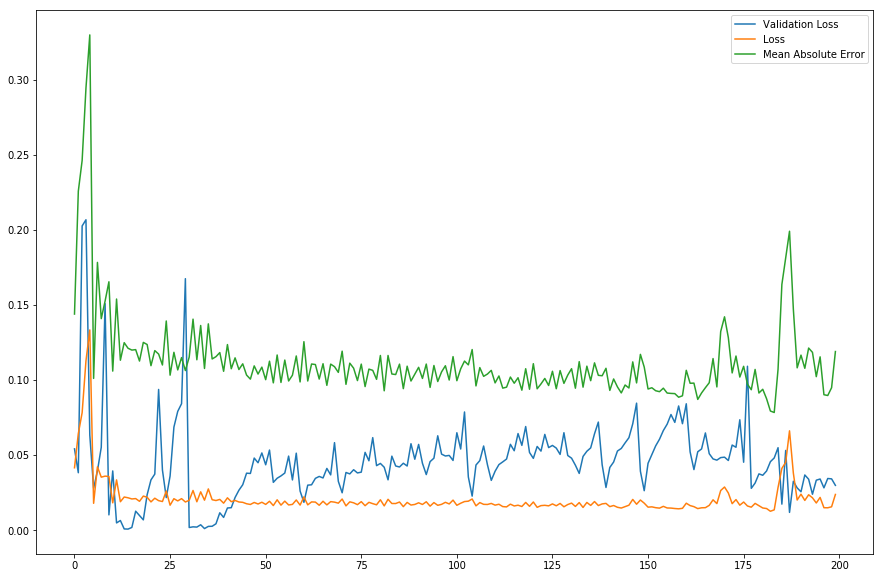

In [869]:
#Plot history 
history.history["val_loss"]
epochs = range(len(history.history["val_loss"]))

plt.plot(epochs, history.history["val_loss"], label = "Validation Loss")
plt.plot(epochs, history.history["loss"], label = "Loss")
plt.plot(epochs, history.history["mean_absolute_error"], label = "Mean Absolute Error")
plt.legend()

In [870]:
model.evaluate_generator(test_generator)

[0.029768671840429306, 0.16819971799850464]

In [871]:
predictions = model.predict_generator(test_generator)

In [872]:
#predictions = np.squeeze(predictions)
predictions.shape

(36, 1)

In [873]:
predictions

array([[0.774039  ],
       [0.7740016 ],
       [0.77397066],
       [0.77394414],
       [0.77393097],
       [0.77391225],
       [0.77388763],
       [0.77383137],
       [0.77377945],
       [0.77372295],
       [0.77369386],
       [0.7736749 ],
       [0.7736365 ],
       [0.7735879 ],
       [0.7735396 ],
       [0.7734839 ],
       [0.7734427 ],
       [0.7733829 ],
       [0.77336663],
       [0.7733377 ],
       [0.77334034],
       [0.7732892 ],
       [0.7732834 ],
       [0.77322716],
       [0.7732228 ],
       [0.7732151 ],
       [0.77320033],
       [0.77317864],
       [0.77316016],
       [0.77314204],
       [0.7731368 ],
       [0.773135  ],
       [0.77312773],
       [0.77311754],
       [0.77311754],
       [0.7730946 ]], dtype=float32)

In [874]:
y_test

array([0.82563409, 0.8463255 , 0.8463255 , 0.8463255 , 0.885292  ,
       0.8700754 , 0.85419663, 0.85055815, 0.85087898, 0.85087898,
       0.85087898, 0.81204215, 0.82310143, 0.81794046, 0.83018057,
       0.8383042 , 0.8383042 , 0.8383042 , 0.79432706, 0.78730242,
       0.70562178, 0.73230033, 0.70489128, 0.70489128, 0.70489128,
       0.73238899, 0.77261149, 0.82331977, 0.86906507, 0.86837557,
       0.86837557, 0.86837557, 0.89640578, 0.89301296, 0.91153355,
       0.88719666, 0.92006001, 0.92006001, 0.92006001, 0.94856806,
       0.93670344, 0.90820906, 0.91782102, 0.90121176, 0.90121176,
       0.90121176, 0.9148992 , 0.9543707 , 0.95043855, 0.95043855,
       0.95637786, 0.95637786, 0.95637786, 0.94496357, 0.97282995,
       0.97730827, 0.97574494, 0.99786334, 0.99786334, 0.99786334,
       0.99297536, 1.        , 0.97990925, 0.9766871 , 0.97351945,
       0.97351945])

In [875]:
x_test

array([[0.22697337, 0.22697337],
       [0.24046867, 0.24046867],
       [0.21990812, 0.21990812],
       [0.18830708, 0.18830708],
       [0.19217576, 0.19217576],
       [0.19585592, 0.19585592],
       [0.24686592, 0.24686592],
       [0.26109479, 0.26109479],
       [0.28878206, 0.28878206],
       [0.21970321, 0.21970321],
       [0.19310195, 0.19310195],
       [0.24770605, 0.24770605],
       [0.2491609 , 0.2491609 ],
       [0.26205786, 0.26205786],
       [0.30585506, 0.30585506],
       [0.3423862 , 0.3423862 ],
       [0.34407465, 0.34407465],
       [0.25918094, 0.25918094],
       [0.262189  , 0.262189  ],
       [0.29806443, 0.29806443],
       [0.3385708 , 0.3385708 ],
       [0.37098328, 0.37098328],
       [0.41054297, 0.41054297],
       [0.36474585, 0.36474585],
       [0.28581498, 0.28581498],
       [0.35493482, 0.35493482],
       [0.36395081, 0.36395081],
       [0.44033671, 0.44033671],
       [0.48556008, 0.48556008],
       [0.54855724, 0.54855724],
       [0.

In [876]:
x_test[:,:2][win_length:]

array([[0.38590064, 0.38590064],
       [0.43151333, 0.43151333],
       [0.50594031, 0.50594031],
       [0.56058538, 0.56058538],
       [0.59013733, 0.59013733],
       [0.64845437, 0.64845437],
       [0.74312224, 0.74312224],
       [0.64274971, 0.64274971],
       [0.56565073, 0.56565073],
       [0.6223285 , 0.6223285 ],
       [0.67366635, 0.67366635],
       [0.67655557, 0.67655557],
       [0.75855187, 0.75855187],
       [0.78960785, 0.78960785],
       [0.75648639, 0.75648639],
       [0.60587433, 0.60587433],
       [0.64558975, 0.64558975],
       [0.67735471, 0.67735471],
       [0.74430661, 0.74430661],
       [0.60207532, 0.60207532],
       [0.70651733, 0.70651733],
       [0.58740385, 0.58740385],
       [0.62541443, 0.62541443],
       [0.6230129 , 0.6230129 ],
       [0.73109409, 0.73109409],
       [0.80417276, 0.80417276],
       [0.89826688, 0.89826688],
       [0.87741536, 0.87741536],
       [0.84828963, 0.84828963],
       [0.7146686 , 0.7146686 ],
       [0.

In [879]:
df_pred = pd.DataFrame()
df_pred = pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,:2][win_length:])], axis = 1)
df_pred

,0,0,1
0,0.774039,0.385901,0.385901
1,0.774002,0.431513,0.431513
2,0.773971,0.505940,0.505940
3,0.773944,0.560585,0.560585
4,0.773931,0.590137,0.590137
5,0.773912,0.648454,0.648454
6,0.773888,0.743122,0.743122
7,0.773831,0.642750,0.642750
8,0.773779,0.565651,0.565651
9,0.773723,0.622329,0.622329


In [880]:
rev_trans = scaler.inverse_transform(df_pred)

In [881]:
rev_trans

array([[188874.02322346,  94164.        ,   2802.68648592],
       [188864.90401697, 105294.        ,   2869.50225074],
       [188857.35558289, 123455.        ,   2978.52660878],
       [188850.8834188 , 136789.        ,   3058.57345588],
       [188847.66915303, 144000.        ,   3101.8626275 ],
       [188843.1022777 , 158230.        ,   3187.28835378],
       [188837.09552765, 181330.        ,   3325.96258266],
       [188823.36581326, 156838.        ,   3178.93188076],
       [188810.69782466, 138025.        ,   3065.99342761],
       [188796.90993351, 151855.        ,   3149.01786853],
       [188789.81236929, 164382.        ,   3224.22012244],
       [188785.18731719, 165087.        ,   3228.45238787],
       [188775.82085949, 185095.        ,   3348.564681  ],
       [188763.95280129, 192673.        ,   3394.05703193],
       [188752.17200822, 184591.        ,   3345.53906146],
       [188738.57319152, 147840.        ,   3124.91496685],
       [188728.52315694, 157531.        

In [882]:
df_final = df[predictions.shape[0]*-1:]
df_final.count()

new_case    36
new_case    36
Close       36
dtype: int64

In [883]:
df.loc["2020-10-18":]

,new_case,new_case,Close
2020-10-18,47119,47119,3483.810059
2020-10-19,60443,60443,3426.919922
2020-10-20,60798,60798,3443.120117
2020-10-21,63945,63945,3435.560059
2020-10-22,74632,74632,3453.489990
2020-10-23,83546,83546,3465.389893
2020-10-24,83958,83958,3465.389893
2020-10-25,63243,63243,3465.389893
2020-10-26,63977,63977,3400.969971
2020-10-27,72731,72731,3390.679932


In [884]:
df_final["Pred"] = rev_trans[:,0]

/cm/shared/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [885]:
df_final

,new_case,new_case,Close,Pred
2020-11-07,94164,94164,3509.439941,188874.023223
2020-11-08,105294,105294,3509.439941,188864.904017
2020-11-09,123455,123455,3550.500000,188857.355583
2020-11-10,136789,136789,3545.530029,188850.883419
2020-11-11,144000,144000,3572.659912,188847.669153
2020-11-12,158230,158230,3537.010010,188843.102278
2020-11-13,181330,181330,3585.149902,188837.095528
2020-11-14,156838,156838,3585.149902,188823.365813
2020-11-15,138025,138025,3585.149902,188810.697825
2020-11-16,151855,151855,3626.909912,188796.909934


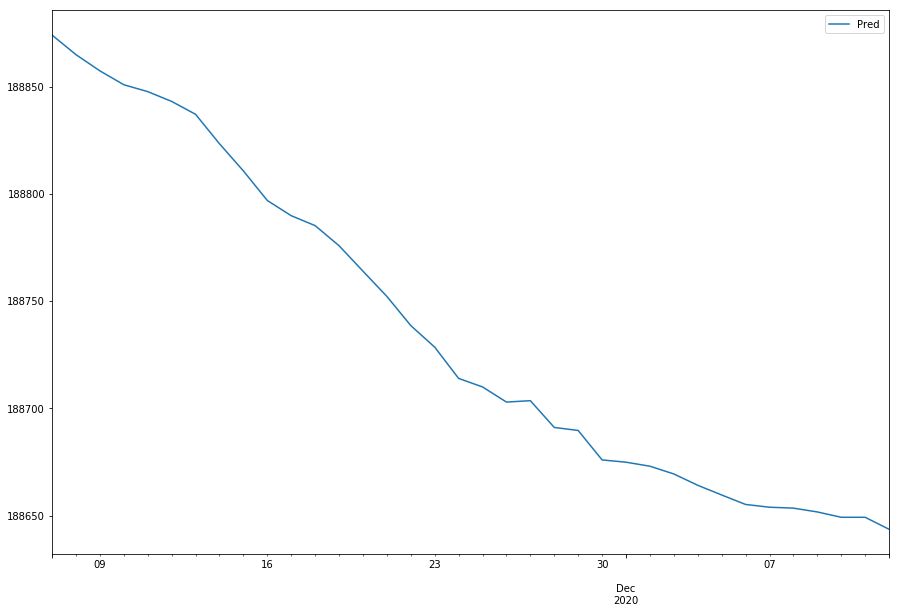

In [886]:
df_final[['Pred',]].plot()

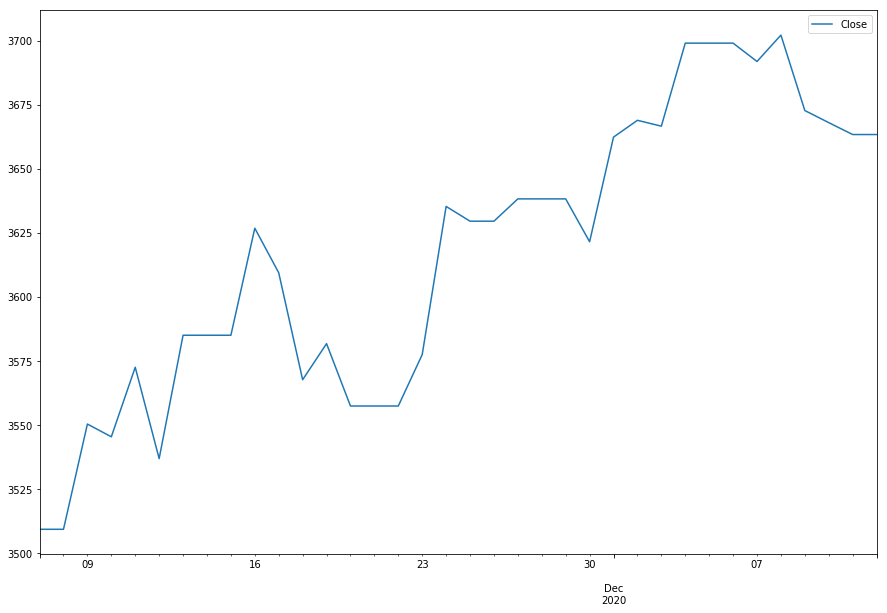

In [887]:
df_final[['Close']].plot()

In [651]:
merged_df

,tot_cases,new_case,tot_death,new_death,Open,High,Low,Close
2020-01-22,1,1,0,0,3330.020020,3337.770020,3320.040039,3321.750000
2020-01-23,1,0,0,0,3315.770020,3326.879883,3301.870117,3325.540039
2020-01-24,2,1,0,0,3333.100098,3333.179932,3281.530029,3295.469971
2020-01-25,2,0,0,0,3333.100098,3333.179932,3281.530029,3295.469971
2020-01-26,5,3,0,0,3333.100098,3333.179932,3281.530029,3295.469971
2020-01-27,5,0,0,0,3247.159912,3258.850098,3234.500000,3243.629883
2020-01-28,5,0,0,0,3255.350098,3285.780029,3253.219971,3276.239990
2020-01-29,5,0,0,0,3289.459961,3293.469971,3271.889893,3273.399902
2020-01-30,5,0,0,0,3256.449951,3285.909912,3242.800049,3283.659912
2020-01-31,7,2,0,0,3282.330078,3282.330078,3214.679932,3225.520020


In [652]:
df

,new_case,Open,Close
2020-01-22,1,3330.020020,3321.750000
2020-01-23,0,3315.770020,3325.540039
2020-01-24,1,3333.100098,3295.469971
2020-01-25,0,3333.100098,3295.469971
2020-01-26,3,3333.100098,3295.469971
2020-01-27,0,3247.159912,3243.629883
2020-01-28,0,3255.350098,3276.239990
2020-01-29,0,3289.459961,3273.399902
2020-01-30,0,3256.449951,3283.659912
2020-01-31,2,3282.330078,3225.520020


# Pearson R Calculation




In [659]:
cor_df = df

cor_df = cor_df[["Open","Close", "new_case"]]
cor_df

,Open,Close,new_case
2020-01-22,3330.020020,3321.750000,1
2020-01-23,3315.770020,3325.540039,0
2020-01-24,3333.100098,3295.469971,1
2020-01-25,3333.100098,3295.469971,0
2020-01-26,3333.100098,3295.469971,3
2020-01-27,3247.159912,3243.629883,0
2020-01-28,3255.350098,3276.239990,0
2020-01-29,3289.459961,3273.399902,0
2020-01-30,3256.449951,3283.659912,0
2020-01-31,3282.330078,3225.520020,2


In [707]:
for i in range(50):
    name = "Shifted by " + str(1+i) + " Days Back"
    cor_df[name] = cor_df["new_case"].shift((-(i+1)))
#cor_df = cor_df.dropna(0)
#add total number of cases
#start with 5 days shifting
cor_df

/cm/shared/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,Close,new_case,Shifted by 1 Days Back,Shifted by 2 Days Back,Shifted by 3 Days Back,Shifted by 4 Days Back,Shifted by 5 Days Back,Shifted by 6 Days Back,Shifted by 7 Days Back,...,Shifted by 41 Days Back,Shifted by 42 Days Back,Shifted by 43 Days Back,Shifted by 44 Days Back,Shifted by 45 Days Back,Shifted by 46 Days Back,Shifted by 47 Days Back,Shifted by 48 Days Back,Shifted by 49 Days Back,Shifted by 50 Days Back
2020-01-22,3330.020020,3321.750000,1,0.0,1.0,0.0,3.0,0.0,0.0,0.0,...,24.0,22.0,62.0,51.0,63.0,153.0,219.0,303.0,285.0,430.0
2020-01-23,3315.770020,3325.540039,0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,...,22.0,62.0,51.0,63.0,153.0,219.0,303.0,285.0,430.0,299.0
2020-01-24,3333.100098,3295.469971,1,0.0,3.0,0.0,0.0,0.0,0.0,2.0,...,62.0,51.0,63.0,153.0,219.0,303.0,285.0,430.0,299.0,371.0
2020-01-25,3333.100098,3295.469971,0,3.0,0.0,0.0,0.0,0.0,2.0,1.0,...,51.0,63.0,153.0,219.0,303.0,285.0,430.0,299.0,371.0,1206.0
2020-01-26,3333.100098,3295.469971,3,0.0,0.0,0.0,0.0,2.0,1.0,0.0,...,63.0,153.0,219.0,303.0,285.0,430.0,299.0,371.0,1206.0,772.0
2020-01-27,3247.159912,3243.629883,0,0.0,0.0,0.0,2.0,1.0,0.0,3.0,...,153.0,219.0,303.0,285.0,430.0,299.0,371.0,1206.0,772.0,2795.0
2020-01-28,3255.350098,3276.239990,0,0.0,0.0,2.0,1.0,0.0,3.0,0.0,...,219.0,303.0,285.0,430.0,299.0,371.0,1206.0,772.0,2795.0,3423.0
2020-01-29,3289.459961,3273.399902,0,0.0,2.0,1.0,0.0,3.0,0.0,0.0,...,303.0,285.0,430.0,299.0,371.0,1206.0,772.0,2795.0,3423.0,4759.0
2020-01-30,3256.449951,3283.659912,0,2.0,1.0,0.0,3.0,0.0,0.0,0.0,...,285.0,430.0,299.0,371.0,1206.0,772.0,2795.0,3423.0,4759.0,3568.0
2020-01-31,3282.330078,3225.520020,2,1.0,0.0,3.0,0.0,0.0,0.0,0.0,...,430.0,299.0,371.0,1206.0,772.0,2795.0,3423.0,4759.0,3568.0,5835.0


In [711]:
shift_df= cor_df.loc["2020-02-15":"2020-05-22"]
shift_df

,Open,Close,new_case,Shifted by 1 Days Back,Shifted by 2 Days Back,Shifted by 3 Days Back,Shifted by 4 Days Back,Shifted by 5 Days Back,Shifted by 6 Days Back,Shifted by 7 Days Back,...,Shifted by 41 Days Back,Shifted by 42 Days Back,Shifted by 43 Days Back,Shifted by 44 Days Back,Shifted by 45 Days Back,Shifted by 46 Days Back,Shifted by 47 Days Back,Shifted by 48 Days Back,Shifted by 49 Days Back,Shifted by 50 Days Back
2020-02-15,3378.080078,3380.159912,0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,18156.0,19309.0,18113.0,22064.0,22715.0,27271.0,26090.0,35085.0,30664.0,25711.0
2020-02-16,3378.080078,3380.159912,0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,19309.0,18113.0,22064.0,22715.0,27271.0,26090.0,35085.0,30664.0,25711.0,42594.0
2020-02-17,3378.080078,3380.159912,0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,18113.0,22064.0,22715.0,27271.0,26090.0,35085.0,30664.0,25711.0,42594.0,22071.0
2020-02-18,3369.040039,3370.290039,0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,22064.0,22715.0,27271.0,26090.0,35085.0,30664.0,25711.0,42594.0,22071.0,31700.0
2020-02-19,3380.389893,3386.149902,0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,22715.0,27271.0,26090.0,35085.0,30664.0,25711.0,42594.0,22071.0,31700.0,31673.0
2020-02-20,3380.449951,3373.229980,0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,27271.0,26090.0,35085.0,30664.0,25711.0,42594.0,22071.0,31700.0,31673.0,34182.0
2020-02-21,3360.500000,3337.750000,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,26090.0,35085.0,30664.0,25711.0,42594.0,22071.0,31700.0,31673.0,34182.0,32735.0
2020-02-22,3360.500000,3337.750000,0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,...,35085.0,30664.0,25711.0,42594.0,22071.0,31700.0,31673.0,34182.0,32735.0,28542.0
2020-02-23,3360.500000,3337.750000,0,0.0,0.0,0.0,1.0,0.0,10.0,6.0,...,30664.0,25711.0,42594.0,22071.0,31700.0,31673.0,34182.0,32735.0,28542.0,24600.0
2020-02-24,3257.610107,3225.889893,0,0.0,0.0,1.0,0.0,10.0,6.0,25.0,...,25711.0,42594.0,22071.0,31700.0,31673.0,34182.0,32735.0,28542.0,24600.0,26082.0


In [712]:
pearson_df = shift_df.corr()
pearson_df[["Close","Open"]]

,Close,Open
Open,0.974363,1.000000
Close,1.000000,0.974363
new_case,-0.277997,-0.302916
Shifted by 1 Days Back,-0.317782,-0.333688
Shifted by 2 Days Back,-0.356644,-0.373457
Shifted by 3 Days Back,-0.392182,-0.402897
Shifted by 4 Days Back,-0.424318,-0.446280
Shifted by 5 Days Back,-0.470578,-0.486569
Shifted by 6 Days Back,-0.499541,-0.516630
Shifted by 7 Days Back,-0.535230,-0.553645


# Coefficient of Determination R^2 for First Wave

In [713]:
fw_df = shift_df

In [714]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

In [715]:
fwres_df = ""
fwres_df = pd.DataFrame(columns = ["RMSE", "R Squared"])
RMSE = []
r2 = []

scaled_df = scaler.fit_transform(fw_df)
scaled_df = pd.DataFrame(scaled_df)
loop = scaled_df.columns
loop = loop.drop(loop[[0,1,2]])

for i in loop:
    target = 1
    predictors = [2, i]
    
    x = scaled_df[predictors].values
    y = scaled_df[target].values
    
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 30, shuffle = True)
    
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    
    pred_test_lr = lr.predict(x_test)
    
    RMSE.append(np.sqrt(mean_squared_error(y_test, pred_test_lr)))
    r2.append(r2_score(y_test, pred_test_lr))

fwres_df["RMSE"] = RMSE
fwres_df["R Squared"] = r2

fwres_df


/cm/shared/apps/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,RMSE,R Squared
0,0.208728,0.169432
1,0.202104,0.221307
2,0.199722,0.239555
3,0.190024,0.311611
4,0.197291,0.257955
5,0.156530,0.532902
6,0.181793,0.369962
7,0.153915,0.548379
8,0.159951,0.512259
9,0.146524,0.590706


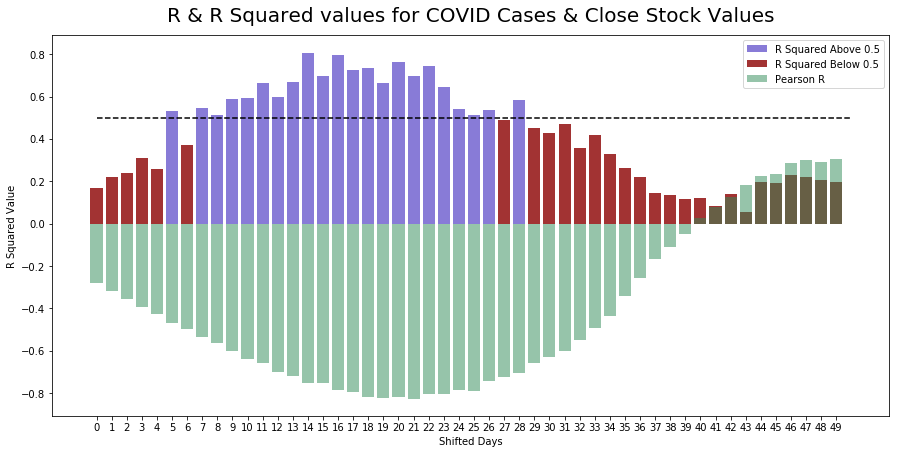

In [721]:
threshold = 0.5
r2 = fwres_df["R Squared"]

r = pearson_df["Close"]

#r = r.reset_index()
#r = r.drop(columns =['index'])
r = r.drop(labels = ['Open','Close','Shifted by 50 Days Back'])
#r_cases = correlation_df["COVID Cases"]
#r_cases = r_cases.drop(labels=['Exits', 'Average Entries', 'COVID Cases', 'COVID Deaths'])

fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize=(15,7))

s = list(range(0, 50))

above_threshold = np.maximum(r2, threshold)
above_threshold = above_threshold.replace( threshold, 0)
below_threshold = np.minimum(r2, threshold)
below_threshold = below_threshold.replace( threshold, 0)

ax.bar(s,above_threshold, alpha = 0.8, color = "slateblue", label = "R Squared Above 0.5")
ax.bar(s,below_threshold, alpha = 0.8, color = "darkred", label = "R Squared Below 0.5")
ax.bar(s, r, alpha = 0.5, color = "seagreen", label = "Pearson R")

ax.plot([0,50],[threshold,threshold], "k--" )


plt.title("R & R Squared values for COVID Cases & Close Stock Values", y = 1.02, fontsize = 20)
plt.xlabel("Shifted Days", y = 1.02)
plt.ylabel("R Squared Value")
plt.xticks(range(0, 50));
plt.legend()

^Create same graph for 2nd & 3rd wave

### NEW LSTM MODEL WITH ONLY FIRST WAVE DATA

In [918]:
# Dropping columns Shifted by 26 days onwards because they are irrelevant 
cols = shift_df.columns

fw_df = shift_df.drop(columns = cols[29:])
fw_df = fw_df.drop(columns = cols[0])
fw_df


,Close,new_case,Shifted by 1 Days Back,Shifted by 2 Days Back,Shifted by 3 Days Back,Shifted by 4 Days Back,Shifted by 5 Days Back,Shifted by 6 Days Back,Shifted by 7 Days Back,Shifted by 8 Days Back,...,Shifted by 17 Days Back,Shifted by 18 Days Back,Shifted by 19 Days Back,Shifted by 20 Days Back,Shifted by 21 Days Back,Shifted by 22 Days Back,Shifted by 23 Days Back,Shifted by 24 Days Back,Shifted by 25 Days Back,Shifted by 26 Days Back
2020-02-15,3380.159912,0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,24.0,22.0,62.0,51.0,63.0,153.0,219.0,303.0,285.0,430.0
2020-02-16,3380.159912,0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,22.0,62.0,51.0,63.0,153.0,219.0,303.0,285.0,430.0,299.0
2020-02-17,3380.159912,0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,62.0,51.0,63.0,153.0,219.0,303.0,285.0,430.0,299.0,371.0
2020-02-18,3370.290039,0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,51.0,63.0,153.0,219.0,303.0,285.0,430.0,299.0,371.0,1206.0
2020-02-19,3386.149902,0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,63.0,153.0,219.0,303.0,285.0,430.0,299.0,371.0,1206.0,772.0
2020-02-20,3373.229980,0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,153.0,219.0,303.0,285.0,430.0,299.0,371.0,1206.0,772.0,2795.0
2020-02-21,3337.750000,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,...,219.0,303.0,285.0,430.0,299.0,371.0,1206.0,772.0,2795.0,3423.0
2020-02-22,3337.750000,0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,6.0,...,303.0,285.0,430.0,299.0,371.0,1206.0,772.0,2795.0,3423.0,4759.0
2020-02-23,3337.750000,0,0.0,0.0,0.0,1.0,0.0,10.0,6.0,25.0,...,285.0,430.0,299.0,371.0,1206.0,772.0,2795.0,3423.0,4759.0,3568.0
2020-02-24,3225.889893,0,0.0,0.0,1.0,0.0,10.0,6.0,25.0,24.0,...,430.0,299.0,371.0,1206.0,772.0,2795.0,3423.0,4759.0,3568.0,5835.0


In [919]:
fw_df.describe()

,Close,new_case,Shifted by 1 Days Back,Shifted by 2 Days Back,Shifted by 3 Days Back,Shifted by 4 Days Back,Shifted by 5 Days Back,Shifted by 6 Days Back,Shifted by 7 Days Back,Shifted by 8 Days Back,...,Shifted by 17 Days Back,Shifted by 18 Days Back,Shifted by 19 Days Back,Shifted by 20 Days Back,Shifted by 21 Days Back,Shifted by 22 Days Back,Shifted by 23 Days Back,Shifted by 24 Days Back,Shifted by 25 Days Back,Shifted by 26 Days Back
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,...,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,2829.765498,16263.469388,16534.326531,16691.112245,16945.877551,17112.755102,17314.153061,17532.122449,17718.479592,17960.295918,...,19951.010204,20128.612245,20338.204082,20560.632653,20789.479592,21048.867347,21271.081633,21459.561224,21748.561224,21980.244898
std,263.720842,13023.061039,12957.189927,12847.553871,12760.409735,12642.906788,12524.139665,12405.014882,12275.453134,12155.646220,...,10856.655736,10668.036898,10468.847771,10263.150958,10048.915863,9834.180563,9600.406658,9361.176577,9135.760811,8869.862395
min,2237.399902,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,22.000000,22.000000,51.000000,51.000000,63.000000,153.000000,219.000000,285.000000,285.000000,299.000000
25%,2711.020020,288.500000,300.000000,320.000000,385.750000,515.500000,880.500000,1603.250000,2952.000000,3459.250000,...,14788.500000,15116.000000,15612.250000,16504.750000,17075.000000,17459.000000,17577.000000,17706.750000,17911.250000,18123.750000
50%,2844.400024,21160.000000,21782.500000,21782.500000,22067.500000,22067.500000,22067.500000,22067.500000,22067.500000,22279.500000,...,22867.500000,22867.500000,22867.500000,22867.500000,22867.500000,23235.000000,23235.000000,23235.000000,23601.000000,23601.000000
75%,2954.142456,26992.250000,26992.250000,26992.250000,26992.250000,26992.250000,26992.250000,26992.250000,26992.250000,26992.250000,...,27256.250000,27256.250000,27256.250000,27256.250000,27256.250000,27256.250000,27256.250000,27256.250000,28115.500000,28115.500000
max,3386.149902,42594.000000,42594.000000,42594.000000,42594.000000,42594.000000,42594.000000,42594.000000,42594.000000,42594.000000,...,42594.000000,42594.000000,42594.000000,42594.000000,42594.000000,42594.000000,42594.000000,42594.000000,42594.000000,42594.000000


In [1040]:
scaler = MinMaxScaler()

data_scaled = scaler.fit_transform(fw_df)

data_scaled.shape

/cm/shared/apps/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


(98, 28)

In [1002]:
features = data_scaled[:,1:28]
target = data_scaled[:,0]
target

98

### Splitting into train & test data

In [1003]:
y_train.size

78

In [1085]:
#features = features.reshape((len(features), 27, 1))

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 40, shuffle = False)

x_train = x_train.reshape(len(x_train), 1, x_train.shape[1])
x_test = x_test.reshape(len(x_test), 1, x_test.shape[1])
#y_train = y_train.reshape(len(y_train), 1, y_train.shape[1])
#y_test = y_test.reshape(len(y_test), 1, y_test.shape[1])

### LSTM Architecture

In [1082]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape = (1,27), return_sequences = True))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.5))
#model.add(tf.keras.layers.LSTM(128, return_sequences = True))
#model.add(tf.keras.layers.LeakyReLU(alpha = 0.5))
#model.add(tf.keras.layers.Dropout(0.1)) #regularization method not to over fit, look into this
#model.add(LSTM(256, return_sequences=True))
model.add(tf.keras.layers.LSTM(64, return_sequences = False))
#model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(1, activation = 'linear'))

In [1073]:
model.summary()

Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_152 (LSTM)              (None, 1, 128)            79872     
_________________________________________________________________
leaky_re_lu_86 (LeakyReLU)   (None, 1, 128)            0         
_________________________________________________________________
lstm_153 (LSTM)              (None, 1, 128)            131584    
_________________________________________________________________
leaky_re_lu_87 (LeakyReLU)   (None, 1, 128)            0         
_________________________________________________________________
dense_56 (Dense)             (None, 1, 1)              129       
Total params: 211,585
Trainable params: 211,585
Non-trainable params: 0
_________________________________________________________________


In [1083]:
model.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["mean_absolute_error"])

history = model.fit(x_train, y_train , epochs = 300, shuffle = False, verbose = 1)

Epoch 1/300
3/3 [==============================] - 0s 8ms/step - loss: 0.2998 - mean_absolute_error: 0.4816
Epoch 2/300
3/3 [==============================] - 0s 5ms/step - loss: 0.2670 - mean_absolute_error: 0.4396
Epoch 3/300
3/3 [==============================] - 0s 5ms/step - loss: 0.2363 - mean_absolute_error: 0.3949
Epoch 4/300
3/3 [==============================] - 0s 5ms/step - loss: 0.2087 - mean_absolute_error: 0.3528
Epoch 5/300
3/3 [==============================] - 0s 5ms/step - loss: 0.1888 - mean_absolute_error: 0.3252
Epoch 6/300
3/3 [==============================] - 0s 5ms/step - loss: 0.1825 - mean_absolute_error: 0.3142
Epoch 7/300
3/3 [==============================] - 0s 6ms/step - loss: 0.1865 - mean_absolute_error: 0.3244
Epoch 8/300
3/3 [==============================] - 0s 5ms/step - loss: 0.1876 - mean_absolute_error: 0.3303
Epoch 9/300
3/3 [==============================] - 0s 5ms/step - loss: 0.1823 - mean_absolute_error: 0.3237
Epoch 10/300
3/3 [==========

In [1084]:
model.evaluate(x_test)

ValueError: in user code:

    /home/ahiremat/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1224 test_function  *
        return step_function(self, iterator)
    /home/ahiremat/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1215 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/ahiremat/.local/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/ahiremat/.local/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/ahiremat/.local/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/ahiremat/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1208 run_step  **
        outputs = model.test_step(data)
    /home/ahiremat/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1174 test_step
        y_pred = self(x, training=False)
    /home/ahiremat/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:976 __call__
        self.name)
    /home/ahiremat/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:180 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer sequential_60 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: [None, 27]


In [1087]:
predictions = model.predict(x_test)

In [1088]:
predictions.shape

(20, 1)

In [1089]:
y_test

array([0.51648319, 0.52695546, 0.54932756, 0.53189991, 0.56042658,
       0.60274224, 0.60274224, 0.60274224, 0.60308164, 0.55079018,
       0.50716004, 0.53545166, 0.54520135, 0.54520135, 0.54520135,
       0.62373015, 0.59677044, 0.63913837, 0.61902947, 0.62507077])

In [1090]:
x_test.shape

(20, 1, 27)

In [1091]:
x_test = x_test.reshape(x_test.shape).reshape(-1, x_test.shape[2])

In [1092]:
fw_pred = pd.DataFrame()
fw_pred = pd.concat([pd.DataFrame( predictions, columns = ["Pred"]), pd.DataFrame(x_test[:,:][0:])], axis = 1)
#fw_pred["Pred"] = predictions
fw_pred

,Pred,0,1,2,3,4,5,6,7,8,...,17,18,19,20,21,22,23,24,25,26
0,0.684309,0.700286,0.453538,0.527962,0.539184,0.730126,0.594356,0.633516,0.570010,0.412006,...,0.532557,0.479799,0.569518,0.622735,0.359785,0.584670,0.380767,0.459760,0.498145,0.424778
1,0.532526,0.453538,0.527962,0.539184,0.730126,0.594356,0.633516,0.570010,0.412006,0.504789,...,0.479799,0.569811,0.622735,0.359965,0.585549,0.381730,0.460602,0.498145,0.424969,0.553233
2,0.519110,0.527962,0.539184,0.730126,0.594356,0.633516,0.570010,0.412006,0.504789,0.488778,...,0.569811,0.622992,0.359965,0.585666,0.383038,0.461441,0.498926,0.424969,0.553381,0.612318
3,0.562950,0.539184,0.730126,0.594356,0.633516,0.570010,0.412006,0.504789,0.488778,0.633775,...,0.622992,0.360401,0.585666,0.383212,0.462580,0.499705,0.425864,0.553381,0.612447,0.348363
4,0.625248,0.730126,0.594356,0.633516,0.570010,0.412006,0.504789,0.488778,0.633775,0.534559,...,0.360401,0.585949,0.383212,0.462732,0.500764,0.426757,0.554077,0.612447,0.348578,0.583544
5,0.555785,0.594356,0.633516,0.570010,0.412006,0.504789,0.488778,0.633775,0.534559,0.752735,...,0.585949,0.383632,0.462732,0.500905,0.427970,0.554770,0.613050,0.348578,0.583682,0.340655
6,0.577824,0.633516,0.570010,0.412006,0.504789,0.488778,0.633775,0.534559,0.752735,0.314857,...,0.383632,0.463098,0.500905,0.428132,0.555712,0.613652,0.349593,0.583682,0.340873,0.478756
7,0.584183,0.570010,0.412006,0.504789,0.488778,0.633775,0.534559,0.752735,0.314857,0.580011,...,0.463098,0.501245,0.428132,0.555838,0.614469,0.350604,0.584330,0.340873,0.478929,0.680033
8,0.437861,0.412006,0.504789,0.488778,0.633775,0.534559,0.752735,0.314857,0.580011,0.551815,...,0.501245,0.428521,0.555838,0.614578,0.351979,0.584977,0.341900,0.478929,0.680139,0.680979
9,0.552814,0.504789,0.488778,0.633775,0.534559,0.752735,0.314857,0.580011,0.551815,0.532798,...,0.428521,0.556140,0.614578,0.352161,0.585855,0.342923,0.479740,0.680139,0.681084,0.414824


In [1094]:
rev_trans = scaler.inverse_transform(fw_pred)
#fw_pred["Close"] = y_test
rev_trans

array([[ 3023.49994081, 29828.        , 19318.        , 22488.        ,
        22966.        , 31099.        , 25316.        , 26984.        ,
        24279.        , 17549.        , 21501.        , 20819.        ,
        26995.        , 22769.        , 32062.        , 13411.        ,
        24705.        , 23504.        , 22694.        , 20448.        ,
        24280.        , 26544.        , 15365.        , 24967.        ,
        16354.        , 19737.        , 21361.        , 18265.        ],
       [ 2849.13923162, 19318.        , 22488.        , 22966.        ,
        31099.        , 25316.        , 26984.        , 24279.        ,
        17549.        , 21501.        , 20819.        , 26995.        ,
        22769.        , 32062.        , 13411.        , 24705.        ,
        23504.        , 22694.        , 20448.        , 24280.        ,
        26544.        , 15365.        , 24967.        , 16354.        ,
        19737.        , 21361.        , 18265.        , 23698. 

In [1095]:
df_final = fw_df[predictions.shape[0]*-1:]
df_final.count()

Close                      20
new_case                   20
Shifted by 1 Days Back     20
Shifted by 2 Days Back     20
Shifted by 3 Days Back     20
Shifted by 4 Days Back     20
Shifted by 5 Days Back     20
Shifted by 6 Days Back     20
Shifted by 7 Days Back     20
Shifted by 8 Days Back     20
Shifted by 9 Days Back     20
Shifted by 10 Days Back    20
Shifted by 11 Days Back    20
Shifted by 12 Days Back    20
Shifted by 13 Days Back    20
Shifted by 14 Days Back    20
Shifted by 15 Days Back    20
Shifted by 16 Days Back    20
Shifted by 17 Days Back    20
Shifted by 18 Days Back    20
Shifted by 19 Days Back    20
Shifted by 20 Days Back    20
Shifted by 21 Days Back    20
Shifted by 22 Days Back    20
Shifted by 23 Days Back    20
Shifted by 24 Days Back    20
Shifted by 25 Days Back    20
Shifted by 26 Days Back    20
dtype: int64

In [1096]:
df_final["Pred"] = rev_trans[:,0]

/cm/shared/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1097]:
df_final

,Close,new_case,Shifted by 1 Days Back,Shifted by 2 Days Back,Shifted by 3 Days Back,Shifted by 4 Days Back,Shifted by 5 Days Back,Shifted by 6 Days Back,Shifted by 7 Days Back,Shifted by 8 Days Back,...,Shifted by 18 Days Back,Shifted by 19 Days Back,Shifted by 20 Days Back,Shifted by 21 Days Back,Shifted by 22 Days Back,Shifted by 23 Days Back,Shifted by 24 Days Back,Shifted by 25 Days Back,Shifted by 26 Days Back,Pred
2020-05-03,2830.709961,29828,19318.0,22488.0,22966.0,31099.0,25316.0,26984.0,24279.0,17549.0,...,20448.0,24280.0,26544.0,15365.0,24967.0,16354.0,19737.0,21361.0,18265.0,3023.499941
2020-05-04,2842.739990,19318,22488.0,22966.0,31099.0,25316.0,26984.0,24279.0,17549.0,21501.0,...,24280.0,26544.0,15365.0,24967.0,16354.0,19737.0,21361.0,18265.0,23698.0,2849.139232
2020-05-05,2868.439941,22488,22966.0,31099.0,25316.0,26984.0,24279.0,17549.0,21501.0,20819.0,...,26544.0,15365.0,24967.0,16354.0,19737.0,21361.0,18265.0,23698.0,26197.0,2833.727953
2020-05-06,2848.419922,22966,31099.0,25316.0,26984.0,24279.0,17549.0,21501.0,20819.0,26995.0,...,15365.0,24967.0,16354.0,19737.0,21361.0,18265.0,23698.0,26197.0,15033.0,2884.088253
2020-05-07,2881.189941,31099,25316.0,26984.0,24279.0,17549.0,21501.0,20819.0,26995.0,22769.0,...,24967.0,16354.0,19737.0,21361.0,18265.0,23698.0,26197.0,15033.0,24980.0,2955.653080
2020-05-08,2929.800049,25316,26984.0,24279.0,17549.0,21501.0,20819.0,26995.0,22769.0,32062.0,...,16354.0,19737.0,21361.0,18265.0,23698.0,26197.0,15033.0,24980.0,14707.0,2875.858058
2020-05-09,2929.800049,26984,24279.0,17549.0,21501.0,20819.0,26995.0,22769.0,32062.0,13411.0,...,19737.0,21361.0,18265.0,23698.0,26197.0,15033.0,24980.0,14707.0,20548.0,2901.174944
2020-05-10,2929.800049,24279,17549.0,21501.0,20819.0,26995.0,22769.0,32062.0,13411.0,24705.0,...,21361.0,18265.0,23698.0,26197.0,15033.0,24980.0,14707.0,20548.0,29061.0,2908.480508
2020-05-11,2930.189941,17549,21501.0,20819.0,26995.0,22769.0,32062.0,13411.0,24705.0,23504.0,...,18265.0,23698.0,26197.0,15033.0,24980.0,14707.0,20548.0,29061.0,29101.0,2740.392344
2020-05-12,2870.120117,21501,20819.0,26995.0,22769.0,32062.0,13411.0,24705.0,23504.0,22694.0,...,23698.0,26197.0,15033.0,24980.0,14707.0,20548.0,29061.0,29101.0,17844.0,2872.445266


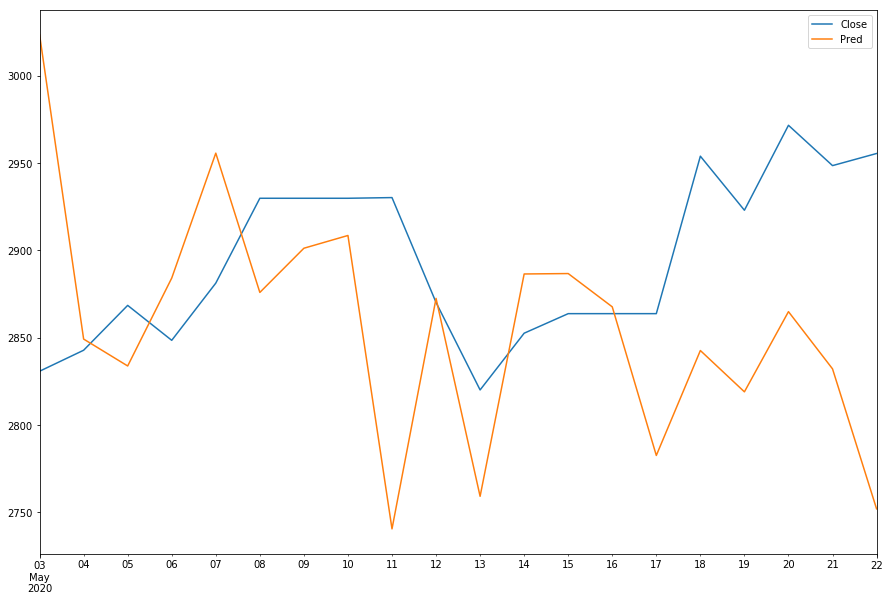

In [1098]:
df_final[["Close","Pred"]].plot()